## Problem Set 4

MACS 30250, Dr. Evans

Ruoyun Tan

In [80]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import time

### Exercise 2.1

In [81]:
beta = 0.442
delta = 0.6415
sigma = 3
A = 1
alpha = 0.35

f_params_init = (3, A, alpha, delta)

def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    
    K = sum(bvec_guess)
    L = sum(nvec)
    r = alpha * A * (L / K) ** (1 - alpha) - delta  
    w = (1 - alpha) * A * (K / L) ** alpha
    c1 = w * nvec[0] - bvec_guess[0]
    c2 = w * nvec[1] + (1 + r) * bvec_guess[0] - bvec_guess[1]
    c3 = w * nvec[2] + (1 + r) * bvec_guess[1]
    
    K_cnstr = (K <= 0)
    c_cnstr = (c1 <= 0, c2 <= 0, c3 <=0)
    b_cnstr = ((c1 <= 0) or (c2 <= 0),  (c2 <= 0) or (c3 <=0))
    
    return(b_cnstr, c_cnstr, K_cnstr)

In [82]:
nvec = np.array([1.0, 1.0, 0.2])
f_params = [nvec, A, alpha, delta]

#### a.

In [83]:
bvec_guess = np.array([1.0, 1.2])
print(feasible(f_params, bvec_guess))

((True, False), (True, False, False), False)


Constraint on consumption in the first period is violated.

#### b.

In [84]:
bvec_guess = np.array([0.06, -0.001])
print(feasible(f_params, bvec_guess))

((False, False), (False, False, False), False)


Nothing is violated.

#### c.

In [85]:
bvec_guess = np.array([0.1, 0.1])
print(feasible(f_params, bvec_guess))

((False, False), (False, False, False), False)


Again, nothing is violated.

### Exercise 2.2

In [86]:
def EulErr(bvec, args):
    nvec, A, alpha, delta, beta, sigma  = args
    b2, b3 = bvec
    K = sum(bvec)
    L = sum(nvec)
    r = alpha * A * (L / K) ** (1 - alpha) - delta  
    w = (1 - alpha) * A * (K / L) ** alpha
    c1 = w * nvec[0] - bvec_guess[0]
    c2 = w * nvec[1] + (1 + r) * bvec_guess[0] - bvec_guess[1]
    c3 = w * nvec[2] + (1 + r) * bvec_guess[1]
    '''
    mu1 = c1 ** (-sigma)
    mu2 = c2 ** (-sigma)
    mu3 = c3 ** (-sigma)
    
    err1 = mu1 - beta * (1 + r) * mu2
    err2 = mu2 - beta * (1 + r) * mu3
    '''
    
    err1 = (w - b2) ** (-sigma)  - beta * (1 + r) * (w + (1 + r) * b2 - b3) ** (-sigma)
    err2 = (w + (1 + r) * b2 - b3) ** (-sigma) - beta * (1 + r) * (0.2 * w + (1 + r) * b3) ** (-sigma)
    errs = np.array([err1, err2])
    
    return errs

def get_SS(params, bvec_guess, SS_graphs):
    
    start_time = time.time() 
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    args = np.array([nvec, A, alpha, delta, beta, sigma])
    result = opt.root(EulErr, bvec_guess, tol=SS_tol, args = args)
    b_ss = result.x 
    EulErr_ss = result.fun
    b2, b3 = b_ss
    
    K_ss = sum(b_ss)
    r_ss = alpha * A * (L / K_ss) ** (1 - alpha) - delta
    w_ss = (1 - alpha) * A * (K_ss / L) ** alpha
    c1   = w_ss * nvec[0] - b2
    c2   = w_ss * nvec[1] + (1 + r_ss) * b2 - b3
    c3   = w_ss * nvec[2] + (1 + r_ss) * b3 
    c_ss = np.array([c1, c2, c3])
    C_ss = sum(c_ss)
    
    Y_ss = A * K_ss ** alpha * L **(1 - alpha)
    
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    
    ss_time = time.time() - start_time
    
    ss_output = {
    'b_ss': b_ss, 
    'c_ss': c_ss, 
    'w_ss': w_ss, 
    'r_ss': r_ss,
    'K_ss': K_ss, 
    'Y_ss': Y_ss, 
    'C_ss': C_ss,
    'EulErr_ss': EulErr_ss, 
    'RCerr_ss': RCerr_ss,
    'ss_time': ss_time}
    
    if SS_graphs:
        plt.plot((1, 2, 3), (c1, c2, c3), label='Consumption')
        plt.plot((2, 3), (b2, b3), label='Savings')
        plt.title('Steady State Consumption and Savings')
        plt.xlabel('Period')
        plt.ylabel('Amount')
        plt.legend();
    return ss_output

#### a.

In [87]:
SS_tol = 1e-10
bvec_guess = np.array([0.1, 0.1])
params = (beta, sigma, nvec, sum(nvec), A, alpha, delta, SS_tol)
SS = get_SS(params, bvec_guess, SS_graphs=False)
print(get_SS(params, bvec_guess, SS_graphs=False))

{'b_ss': array([0.01931253, 0.0584111 ]), 'c_ss': array([0.18241213, 0.20961468, 0.24087387]), 'w_ss': 0.20172465739052575, 'r_ss': 2.433062339127069, 'K_ss': 0.07772362575316386, 'Y_ss': 0.6827603788602411, 'C_ss': 0.6329006729395864, 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]), 'RCerr_ss': 8.326672684688674e-17, 'ss_time': 0.0006299018859863281}


#### b.

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.0006899833679199219}

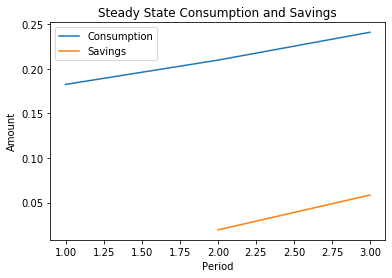

In [88]:
get_SS(params, bvec_guess, SS_graphs=True)

#### c.

In [89]:
params  = (0.55, sigma, nvec, sum(nvec), A, alpha, delta, SS_tol)
get_SS(params, bvec_guess, SS_graphs=False)

{'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'w_ss': 0.22415219593446262,
 'r_ss': 1.8863765057190747,
 'K_ss': 0.10504237022597478,
 'Y_ss': 0.7586689708551043,
 'C_ss': 0.6912842903551415,
 'EulErr_ss': array([ 5.68434189e-14, -2.84217094e-14]),
 'RCerr_ss': 1.3877787807814457e-17,
 'ss_time': 0.0005781650543212891}

If $\beta$ increases, we see that the consumptions, savings, and $\bar{w}$ increase, while $\bar{r}$ decreases. This is to say that people save more and plan to consume more in the future, resulting in lower interest rate and higher wages.

### Exercise 3

In [113]:
beta = 0.442
T = 50
xi = 0.1
L = sum(nvec)
bvec = np.array([0.1, 0.1])
#params = (beta, sigma, nvec, L, A, alpha, delta, SS_tol)
b_ss   = SS['b_ss']
b2_end = b_ss[0]
b3_end = b_ss[1]
K_end   = sum(b_ss)
b2_first = b2_end * 0.8
b3_first = b3_end * 1.1
K_first = sum(b_first)
K_vec  = np.linspace(K_first, K_end, T)
K_vec = np.append(K_vec, K_end)

In [115]:
dist = 10
i = 0
while dist > 1e-10:
    r_vec  = alpha * A * (L / K_vec) ** (1 - alpha) - delta
    w_vec  = (1 - alpha) * A * (K_vec / L) ** alpha
    i += 1
    print(dist)
    b2_vec = np.zeros(T)
    b3_vec = np.zeros(T)
    err1_vec   = np.zeros(T)
    err2_vec   = np.zeros(T)
    b2_vec[0] = b2_first
    b3_vec[0] = b3_first
    for t in range(1, T+1):
        if t == 1:
            def get_EulErr_first(b31):
                b2 = b2_vec[0]
                w1, w2 = w_vec[:2]
                r1, r2 = r_vec[:2]
                EulErr_first = (w1 + (1 + r1) * b2 - b31) ** (-sigma) - beta * (1 + r2) * ((1 + r2) * b31 + 0.2 * w2) ** (-sigma) 

                return EulErr_first
            
            result = opt.minimize(get_EulErr_first, 0.1, tol = epsilon * 1e-2, method = 'Nelder-Mead')
            b3_vec[1] = result.x
            err2_vec[1] = get_EulErr_first(result.x)
        else:
            def get_EulErr_following(bvec):
                b31, b2 = bvec
                b3 = b3_vec[t-1]
                w1, w2, w3 = w_vec[t-2:t+1]
                r2, r3 = r_vec[t-1:t+1]

                err1 = (w1 - b2) ** (-sigma) - beta * (1 + r2) * (w2 + (1 + r2) * b2 - b31) ** (-sigma)
                err2 = (w2 + (1 + r2) * b2 - b31) ** (-sigma) - beta * (1 + r3) * ((1 + r3) * b31 + 0.2 * w3) ** (-sigma)

                return err1, err2
            def se(bvec):
                err1, err2 = get_EulErr_following(bvec)
                
                return (err1 ** 2 + err2 ** 2)
            result = opt.minimize(se, [0.1, 0.1], tol = epsilon * 1e-2, method = 'Nelder-Mead')
            if t != T:
                b3_vec[t], b2_vec[t-1] = result.x
                err1_vec[t-1], err2_vec[t] = get_EulErr_following(result.x)
            else:
                b2_vec[t-1] = result.x[1]
                err1_vec[t-1] = get_EulErr_following(result.x)[1]
                
        
    K2 = b2_vec + b3_vec
    dist = sum((K2 - K_vec[0:T]) ** 2)
    K_vec = (1 - xi) * K_vec + xi * np.append(K2, K_ss)
    

10


/Users/ruoyuntan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power


#### a.

In [116]:
print("The maximum absolute values of all the Euler errors across the entire time path are", max(abs(err1_vec)), "and", abs(max(err2_vec)), ",respectively.")

Y_vec = A * K_vec[0:T] ** alpha * L ** (1 - alpha)
#c1 = w_vec - bvec[:,0]
#c2 = w_vec + (1 + r_vec) * bvec[:,0] - bvec[:,1]
#c3 = 0.2 * w_vec + (1 + r_vec) * bvec[:,1]
C_vec = w_vec[0:T] - b2_vec + w_vec[0:T] + (1 + r_vec[0:T]) * b2_vec - b3_vec + 0.2 * w_vec[0:T] + (1 + r_vec[0:T]) * b3_vec

agg_err = Y_vec - C_vec - K_vec[1:T+1] + (1 - delta) * K_vec[0:T]
#agg_err = Y_vec - c1[0:T] - c2[0:T] - c3[0:T] - K_vec[1:] - (1 - delta) * K_vec[0:-1]

print("The maximum of the absolute value of all the aggregate resource constraint errors is", max(abs(agg_err)))


The maximum absolute values of all the Euler errors across the entire time path are 5.107105494062125e-08 and 4.637412587271683e-08 ,respectively.
The maximum of the absolute value of all the aggregate resource constraint errors is 0.055707941994083854


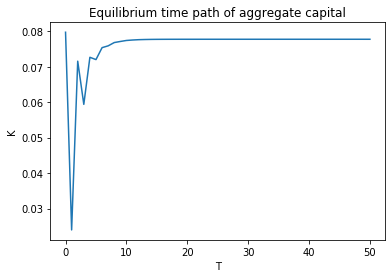

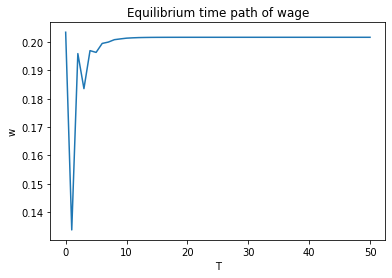

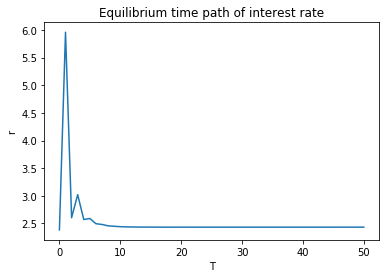

In [117]:
plt.plot(K_vec, label='Capital')
plt.title('Equilibrium time path of aggregate capital')
plt.xlabel('T')
plt.ylabel('K')
plt.show()

plt.plot(w_vec, label='Wage')
plt.title('Equilibrium time path of wage')
plt.xlabel('T')
plt.ylabel('w')
plt.show()

plt.plot(r_vec, label='Interest rate')
plt.title('Equilibrium time path of interest rate')
plt.xlabel('T')
plt.ylabel('r')
plt.show()

#### c.

In [126]:
close = min(np.where(abs(K_end - K_vec) < 1e-5)[0]) + 1
converge = max(np.where(abs(K_end - K_vec) > 1e-5)[0]) + 2
print("It take", close, "for the economy to get within 0.00001 of the steady-state aggregate capital stock")
print("After the", converge, "period, the aggregate capital stock never is again farther than 0.00001 away from the steady-state")

It take 18 for the economy to get within 0.00001 of the steady-state aggregate capital stock
After the 18 period, the aggregate capital stock never is again farther than 0.00001 away from the steady-state
